In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, metrics,grid_search
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24
plt.rcParams["figure.figsize"] = [14,8]

Авторы: Ночевкин Виктор, Толканев Артем
Ссылка на задачу и данные на Kaggle: https://www.kaggle.com/harlfoxem/housesalesprediction

Цель - предсказать стоимость домов в зависимости от череды параметров, таких как жилая площадь, местоположение и т.д.

В качестве метода будем использовать стохастический градиентный спуск, потому что именно его мы прошли на последней лекции.

In [8]:
#Импортируем таблицу:

data = pd.read_csv('kc_house_data.csv')

#Конвертируем строку даты и уберем ненужные буквенные символы и нули
data['date_to_str']=data['date'].astype(str).str.slice(0,8)
#Уберем ненужные столбцы и проверим то что получилось
data.drop(columns=['id','date'],inplace=True) 
data.iloc[:10]


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_to_str
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,20141013
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,20141209
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,20150225
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,20141209
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,20150218
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,20140512
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,20140627
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,20150115
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,20150415
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,20150312


In [9]:
# Вытащим целевую переменную и уберем из признакового датасета
target_data = data['price']
training_data = data.drop(['price'],axis=1)
# Разобьем выборку на тест и обучение
X_train, X_test, y_train, y_test = train_test_split(training_data, target_data, test_size=0.20, random_state=30, shuffle=True)

Очевидны различные масштабы данных, а потому целесообрано нормализовать наши данные, чтобы облегчить интерпретацию значимости признаков.

In [10]:
#Проведем нормальзацию данных во избежании связанных с этим проблем с весами
scaler=StandardScaler()
scaler.fit(X_train,y_train)
scaled_train_data = scaler.transform(X_train)
scaled_test_data = scaler.transform(X_test) 

Перейдем к использованию метода с некоторыми подобранными вручную параметрами. Уточнять их будем позже.

 Абсолютная ошибка на тесте:  121323.5237598091 
 Абсолютная ошибка на данных: 124242.32805867802 
 R2 скоринг на тесте: 0.7153526085473876 
 R2 скоринг на данных: 0.6937478605580414


(0, 1000000)

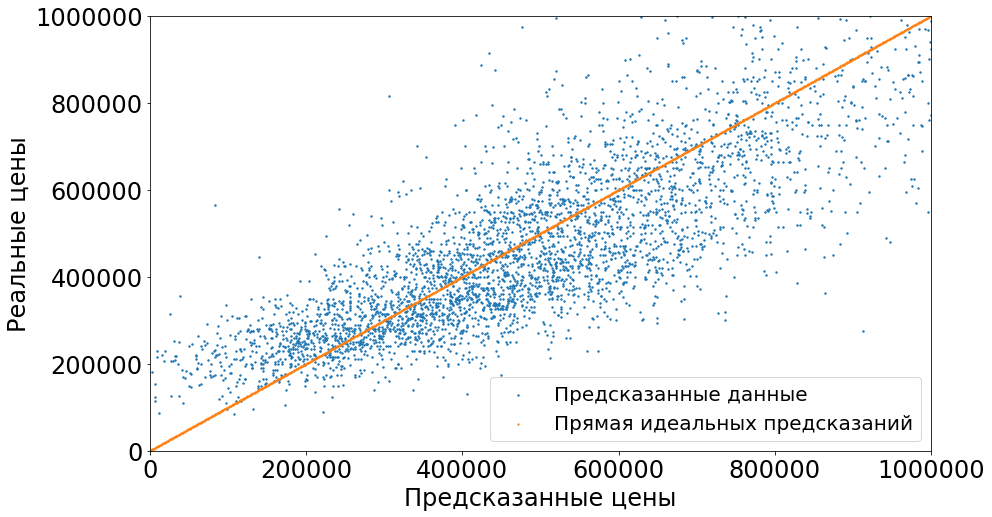

In [28]:
#Воспользуемся стохастическим градиентным спуском, с двумя регуляризациями и подобранными вручную параметрами, мы займемся ими позже
regressor = linear_model.SGDRegressor(random_state = 0,penalty = 'elasticnet',alpha=0.08,max_iter = 200)
regressor.fit(scaled_train_data, y_train)
#Абсолютная ошибка
test_error=metrics.mean_absolute_error(y_test, regressor.predict(scaled_test_data)) 
train_error=metrics.mean_absolute_error(y_train, regressor.predict(scaled_train_data))
#r2 скоринг
r2_test=metrics.r2_score(y_test, regressor.predict(scaled_test_data))
r2_train=metrics.r2_score(y_train, regressor.predict(scaled_train_data))
print(' Абсолютная ошибка на тесте: ',test_error,'\n','Абсолютная ошибка на данных:', train_error,'\n','R2 скоринг на тесте:', r2_test,'\n','R2 скоринг на данных:', r2_train)
#Нарисуем график где по оси y - действительные значения а по оси x - предсказанные значения. 
#Чем ближе точки к диагонали тем лучше справляется модель
plt.scatter(y=y_test,x=regressor.predict(scaled_test_data),s=2,label = 'Предсказанные данные' )
#По диагонали отложим идеальную предсказательную модель:
x=np.arange(0,1000000,1000)
plt.scatter(x=x,y=x,s=1.5,label = 'Прямая идеальных предсказаний')
plt.legend(loc = 4, prop = {'size' : 20})
plt.xlabel ("Предсказанные цены")
plt.ylabel ("Реальные цены")
plt.ylim(0,1000000)
plt.xlim(0,1000000)


Таким образом получили скоринг в районе 0.7, в идеале стоит сделать кросс валидацию для уточнения, но мы вернемся к нему позже во время подбора параметров линейного метода.

Проанализируем графики зависимости цены от отдельных признаков, и сравним полученные веса.

In [29]:
data.keys()

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date_to_str'],
      dtype='object')

        Attribute         Value
0        bedrooms -24619.138100
1       bathrooms  31170.670178
2     sqft_living  76465.899751
3        sqft_lot   2939.699194
4          floors   6633.407402
5      waterfront  39054.080703
6            view  36591.969435
7       condition  21239.335690
8           grade  97847.584038
9      sqft_above  70762.591079
10  sqft_basement  26421.333105
11       yr_built -68263.867772
12   yr_renovated  11170.950139
13        zipcode -23950.290968
14            lat  80084.213622
15           long -28029.830449
16  sqft_living15  29062.031278
17     sqft_lot15  -9289.539802
18    date_to_str  11864.034028


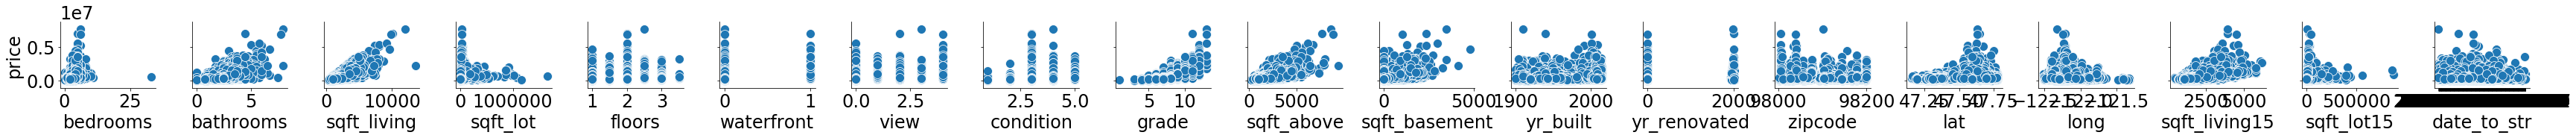

In [37]:
#Напечатаем наши коэффициенты весов:
names = ["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "view", "condition", "grade", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "zipcode", "lat", "long", "sqft_living15", "sqft_lot15",'date_to_str']
Coeffs = pd.DataFrame(columns=['Attribute','Value'])
Coeffs.Attribute=names
Coeffs.Value=regressor.coef_
print(Coeffs)
# P.S. Для увеличения размера изображения кликните дважды
g = sns.pairplot(data,  x_vars = ["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "view", "condition", "grade", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "zipcode", "lat", "long", "sqft_living15", "sqft_lot15",'date_to_str'] , y_vars=["price"])

   Здесь можно видеть графическое подтверждение высоких весов у sqft_living (Жилая площадь), sqft_above  (площадь без подвальных помещений), grade (Оценка риэлтором).
   Из неочевидного: yr_built (год постройки) - покупателям явно нравятся античные дома, и lat (широта) - характеризует распределение благополучия жителей и местности на нашей местности.

Займемся подбором более оптимальных параметров.
Для начала сделаем pipeline чтобы автоматизировать процесс нормализации и применения метода.

In [40]:
pipeline = Pipeline(steps = [('scaling', scaler), ('regression', regressor)])
#Проверим что pipeline работает:
pipeline.fit(X_train,y_train)
metrics.r2_score(y_test, pipeline.predict(X_test))

0.7153526085473876

In [41]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'scaling', 'regression', 'scaling__copy', 'scaling__with_mean', 'scaling__with_std', 'regression__alpha', 'regression__average', 'regression__epsilon', 'regression__eta0', 'regression__fit_intercept', 'regression__l1_ratio', 'regression__learning_rate', 'regression__loss', 'regression__max_iter', 'regression__n_iter', 'regression__penalty', 'regression__power_t', 'regression__random_state', 'regression__shuffle', 'regression__tol', 'regression__verbose', 'regression__warm_start'])

In [48]:
#Заданим регулируемые параметры. 
#В процессе создания этой программы мы перебрали различные параметры, такие как тип регуляризации и alpha, а так же доли l1  l2 регуляризаци
# Полный перебор по этим значениям может занимать часы, поэтому мы оставим нашу последнюю итерацию GridSearch'а:
parameters_grid = {
    
    'regression__penalty' : ['elasticnet'],
    'regression__l1_ratio' : [0.5,0.7,0.8],
    'regression__alpha' : [  0.03],
    'scaling__with_mean' : [0., 0.5],
}

grid_cv = grid_search.GridSearchCV(pipeline, parameters_grid, scoring = 'r2', cv = 10)

In [49]:
%%time
grid_cv.fit(training_data,target_data)

Wall time: 1min 22s


GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaling', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regression', SGDRegressor(alpha=0.08, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=200, n_iter=None,
       penalty='elasticnet', power_t=0.25, random_state=0, shuffle=True,
       tol=None, verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'regression__penalty': ['elasticnet'], 'regression__l1_ratio': [0.5, 0.7, 0.8], 'regression__alpha': [0.03], 'scaling__with_mean': [0.0, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)

In [50]:
#Выведем усредненную на кросс-валидации оценку с лучшими параметрами:
print (grid_cv.best_score_)
print (grid_cv.best_params_)

0.696404908685159
{'regression__alpha': 0.03, 'regression__l1_ratio': 0.5, 'regression__penalty': 'elasticnet', 'scaling__with_mean': 0.5}


Точность получилась меньше, чем на предыдущем разбиении на тестовую и обучающую выборку. Причина банальна - здесь оценка получена методом кросс-валидации, то есть как средняя оценка от использования на n разбиениях данных на тестовую и обучающую, а потому эта оценка более надежна.

###### Результаты
   В результате использования линейного метода мы смогли получить регрессию с точностью r2_score~0.696. 
Анализ весов указал на уже известные важные признаки и на менее очевидные,связанные с годом постройки дома и его местоположением.